## Steepest descent vs CG to solve linear problems

- We first define an linear operator $A$ (a matrix)
- We compute $y = Ax$ and then find the minimum of $|Ax-y|_2^2$
- The minimum is computed via CG and SD methods
- $x$ is a vector of two elements in order to plot the solution at each step of CG and SD.

In [56]:
using Random

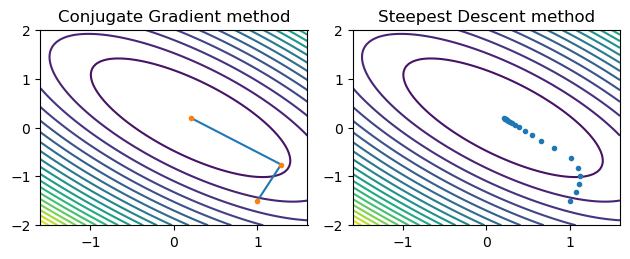

In [153]:
rng = MersenneTwister(12724);
A = randn(rng,130,2); 
(U,S,V) = svd(A); S[1]=1.0; S[2]=0.4; A= U*diagm(S)*V;
x = [0.2,0.2]; y = A*x; x0 = [1.0,-1.5]

x1, p1 = cg_ls(A,x0,y,2 )           # Minimize cost via the CG method
x2, p2 =    sd(A,x0,y,25)           # Minimize cost via the SD method


x1, x2, J = Cost(A,y)

close("all")
subplot(221);
contour(x1,x2,J,20)
plot(p1[:,1],p1[:,2])
plot(p1[:,1],p1[:,2],".")
title("Conjugate Gradient method")

subplot(222);
contour(x1,x2,J,20)
plot(p2[:,1],p2[:,2],".")
title("Steepest Descent method")

tight_layout()
gcf()

In [118]:
function Cost(A,y)
    
    (N,M)=size(A);
    L = 40

    x1 = 0.04*[k for k in -L:L]
    x2 = 0.05*[k for k in -L:L]
  

    J = zeros(2*L+1,2*L+1)
    
    for i1=1:2*L+1
        for i2=1:2*L+1
            x = vcat(x1[i1] ,x2[i2] )
            e=A*x-y
            J[i2,i1] = e'*e
        end
    end

    return x1,x2,J

end

Cost (generic function with 1 method)

In [147]:
function sd(A,x0,y,max_iter)
    # Steepest descent to solve x = argmin_x { ||A x - y ||_2^2 }
    (N,M) = size(A)
    M = length(x0)
    x = x0
    path = zeros(max_iter+1,M)
    path[1,:] .= x0
    
    e = A*x0-y
        ee = sum(e.^2)

k=1;
    while ee>0.0001 
        e = A*x-y
        ee = sum(e.^2)
        grad=A'*e
        u = A*grad
        step = .25*(u'*e)/(u'*u)
        x = x - step*grad
    path[k+1,:] .=x
    k=k+1
    end
   
    return x,path[1:k-1,:]
end
    

sd (generic function with 1 method)

In [3]:
function  cg_ls(A,x0,y,max_iter)
#
# Conjugate Gradient Method for solving x = argmin_x { ||A x - y ||_2^2 }
# Saves the solution path to ilustrate the method.
    
    (N,M) = size(A) 
    
    # Initialization
    
    x = x0
    s = y-A*x
    p = A'*s
    r = p
    q = A*p
    old = r'*r
    M = length(x0)
    path = zeros(max_iter+1,M)
    
    path[1,:] .= x0
   
    
    for k=1:max_iter
        alpha = r'*r/(q'*q)
        x = x + alpha*p
        path[k+1,:] .= x
        s = s - alpha*q
        r = A'*s
        new = r'*r
        beta = new/old
        old = new
        p = r + beta*p
        q = A*p
    end
    
    return x, path
end

cg_ls (generic function with 1 method)